In [51]:
# pip install yfinance

In [52]:
import numpy as np
import pandas as pd
import yfinance as yf
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [53]:
hsi = yf.download("^HSI", start="2020-01-01", end="2023-01-01").droplevel('Ticker', axis=1)
#hsi.index = hsi.index.strftime("%Y-%m-%d")
hsi.head(3)

C:\Users\USER\AppData\Local\Temp\ipykernel_16244\2482955900.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,28543.519531,28543.519531,28245.970703,28249.369141,1262700000
2020-01-03,28451.500000,28883.300781,28428.169922,28828.359375,1797900000
2020-01-06,28226.189453,28367.869141,28054.289062,28326.500000,1793400000


## 62. Moving Average - rolling mean
<pre>Prepare new column 'MA10' moving average 10 days mean value.</pre>


In [54]:
hsi['MA10'] = hsi['Close'].rolling(10).mean()
hsi.tail(5)

Price,Close,High,Low,Open,Volume,MA10
Date,,,,,,
2022-12-22,19679.220703,19735.000000,19475.679688,19537.449219,1939800000,19474.073047
2022-12-23,19593.060547,19686.769531,19380.470703,19382.230469,1363700000,19443.292187
2022-12-28,19898.910156,20099.769531,19787.939453,19787.939453,2823800000,19486.820117
2022-12-29,19741.140625,19764.519531,19539.839844,19648.400391,2902400000,19501.314258
2022-12-30,19781.410156,20073.919922,19781.410156,20030.849609,1747700000,19512.110352


## 63. Exponentially Weighted Moving Average (EMA)
<pre>Prepare 10 days EMA data in new column EMA10
Syntax:
Series.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None, method='single')</pre>

In [55]:
hsi['EMA10'] = hsi['Close'].ewm(span=10).mean()
hsi.tail(5)

Price,Close,High,Low,Open,Volume,MA10,EMA10
Date,,,,,,,
2022-12-22,19679.220703,19735.000000,19475.679688,19537.449219,1939800000,19474.073047,19329.083741
2022-12-23,19593.060547,19686.769531,19380.470703,19382.230469,1363700000,19443.292187,19377.079524
2022-12-28,19898.910156,20099.769531,19787.939453,19787.939453,2823800000,19486.820117,19471.957821
2022-12-29,19741.140625,19764.519531,19539.839844,19648.400391,2902400000,19501.314258,19520.900149
2022-12-30,19781.410156,20073.919922,19781.410156,20030.849609,1747700000,19512.110352,19568.265605


## 64. Getting specific period MA/EMA
<pre>Use slicing series and get the last row of data</pre>

In [56]:
hsi['Close'][-10:].rolling(10).mean().iloc[-1]

19512.1103515625

In [57]:
hsi['Close'][-10:].ewm(span=10).mean().iloc[-1]

19618.33963667069

In [58]:
hsi['Close'].ewm(span=10).mean().iloc[-1]

19568.265604826247

## 65. Rolling Kurtosis (Fisher’s definition)
<pre>Time frame of Kurtosis is usually more than 30 period
Let calculate 50 days kurtosis.</pre>

In [59]:
hsi['Kurt50'] = hsi['Close'].rolling(50).kurt()
hsi.tail(5)

Price,Close,High,Low,Open,Volume,MA10,EMA10,Kurt50
Date,,,,,,,,
2022-12-22,19679.220703,19735.000000,19475.679688,19537.449219,1939800000,19474.073047,19329.083741,-1.232598
2022-12-23,19593.060547,19686.769531,19380.470703,19382.230469,1363700000,19443.292187,19377.079524,-1.244126
2022-12-28,19898.910156,20099.769531,19787.939453,19787.939453,2823800000,19486.820117,19471.957821,-1.239929
2022-12-29,19741.140625,19764.519531,19539.839844,19648.400391,2902400000,19501.314258,19520.900149,-1.247615
2022-12-30,19781.410156,20073.919922,19781.410156,20030.849609,1747700000,19512.110352,19568.265605,-1.217817


## 66. Rolling Skewness
<pre>We could compare the short term 50 days Skewness and Kurtosis
to the 250 days histogram, then we would know the recent situation.</pre>

In [60]:
hsi['Skew50'] = hsi['Close'].rolling(50).skew()
hsi.tail(5)

Price,Close,High,Low,Open,Volume,MA10,EMA10,Kurt50,Skew50
Date,,,,,,,,,
2022-12-22,19679.220703,19735.000000,19475.679688,19537.449219,1939800000,19474.073047,19329.083741,-1.232598,-0.145976
2022-12-23,19593.060547,19686.769531,19380.470703,19382.230469,1363700000,19443.292187,19377.079524,-1.244126,-0.208008
2022-12-28,19898.910156,20099.769531,19787.939453,19787.939453,2823800000,19486.820117,19471.957821,-1.239929,-0.258532
2022-12-29,19741.140625,19764.519531,19539.839844,19648.400391,2902400000,19501.314258,19520.900149,-1.247615,-0.310313
2022-12-30,19781.410156,20073.919922,19781.410156,20030.849609,1747700000,19512.110352,19568.265605,-1.217817,-0.375461


## 67. Rolling 250 days Max and Min
<pre>Let drop unnecessary columns in this exercise.
hsi = hsi.drop(['Open','High','Low','Volume'], axis=1)
Then we add rolling 250 days Max and Min.</pre>

In [61]:
hsi = hsi.drop(['Open','High','Low','Volume'], axis=1)

In [62]:
hsi['250Max'] = hsi['Close'].rolling(250).max()

In [63]:
hsi['250Min'] = hsi['Close'].rolling(250).min()
hsi.tail(5)

Price,Close,MA10,EMA10,Kurt50,Skew50,250Max,250Min
Date,,,,,,,
2022-12-22,19679.220703,19474.073047,19329.083741,-1.232598,-0.145976,24965.550781,14687.019531
2022-12-23,19593.060547,19443.292187,19377.079524,-1.244126,-0.208008,24965.550781,14687.019531
2022-12-28,19898.910156,19486.820117,19471.957821,-1.239929,-0.258532,24965.550781,14687.019531
2022-12-29,19741.140625,19501.314258,19520.900149,-1.247615,-0.310313,24965.550781,14687.019531
2022-12-30,19781.410156,19512.110352,19568.265605,-1.217817,-0.375461,24965.550781,14687.019531


## 68. Rolling Standard Deviation (STD)
<pre>Measuring volatility and risk with Standard Deviation.
Let use 250 days STD</pre>

In [64]:
hsi['250Std'] = hsi['Close'].rolling(250).std()
hsi.tail(5)

Price,Close,MA10,EMA10,Kurt50,Skew50,250Max,250Min,250Std
Date,,,,,,,,
2022-12-22,19679.220703,19474.073047,19329.083741,-1.232598,-0.145976,24965.550781,14687.019531,2365.320875
2022-12-23,19593.060547,19443.292187,19377.079524,-1.244126,-0.208008,24965.550781,14687.019531,2360.480438
2022-12-28,19898.910156,19486.820117,19471.957821,-1.239929,-0.258532,24965.550781,14687.019531,2354.616331
2022-12-29,19741.140625,19501.314258,19520.900149,-1.247615,-0.310313,24965.550781,14687.019531,2348.397469
2022-12-30,19781.410156,19512.110352,19568.265605,-1.217817,-0.375461,24965.550781,14687.019531,2341.891306


In [65]:
hsi['Return'] = hsi.Close.pct_change(1)

In [66]:
hsi.Return.quantile(0.05)

-0.025367629525734358

In [67]:
hsi.iloc[-250:].Close.quantile(0.05)   # Value at Risk  , VaR    var=variance

16315.454638671876

<Axes: xlabel='Date'>

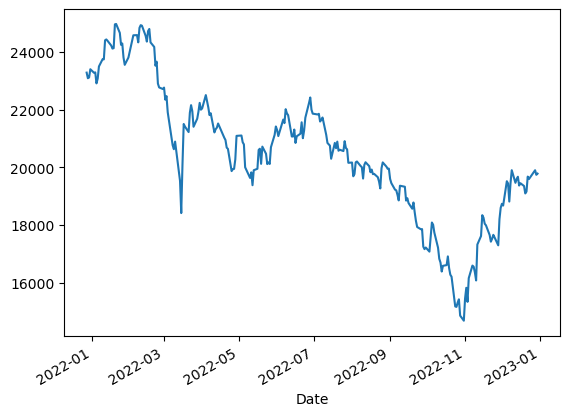

In [68]:
hsi.iloc[-250:].Close.plot()

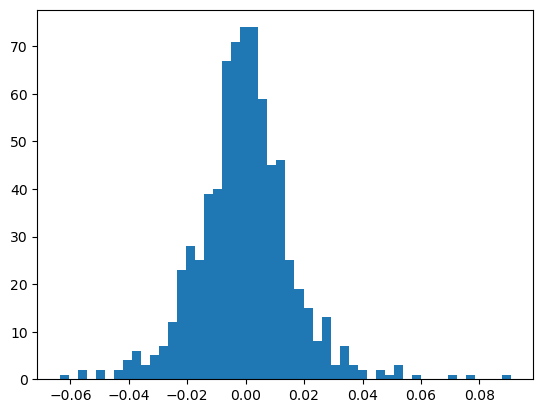

In [69]:
import matplotlib.pyplot as plt
plt.hist(hsi['Return'], bins=50);

In [70]:
hsi['Return'].quantile(0.05)

-0.025367629525734358

## 69. Rolling Quantile
<pre>Value-at-risk (VaR) measures the downside investment 
risk of a single investment. The field generally accept 
the lower 5% quantile as the risk needed to hedge.
Therefore we may need to the 250 days lowest 5% price area.
</pre>

In [71]:
hsi['VaR'] = hsi['Close'].rolling(250).quantile(0.05) #
hsi.tail(5)

Price,Close,MA10,EMA10,Kurt50,Skew50,250Max,250Min,250Std,Return,VaR
Date,,,,,,,,,,
2022-12-22,19679.220703,19474.073047,19329.083741,-1.232598,-0.145976,24965.550781,14687.019531,2365.320875,0.027073,16315.454639
2022-12-23,19593.060547,19443.292187,19377.079524,-1.244126,-0.208008,24965.550781,14687.019531,2360.480438,-0.004378,16315.454639
2022-12-28,19898.910156,19486.820117,19471.957821,-1.239929,-0.258532,24965.550781,14687.019531,2354.616331,0.015610,16315.454639
2022-12-29,19741.140625,19501.314258,19520.900149,-1.247615,-0.310313,24965.550781,14687.019531,2348.397469,-0.007929,16315.454639
2022-12-30,19781.410156,19512.110352,19568.265605,-1.217817,-0.375461,24965.550781,14687.019531,2341.891306,0.002040,16315.454639


In [72]:
import plotly.express as px
fig = px.line(hsi[-250:], x=hsi.index[-250:], y=hsi['Close'][-250:])
fig.show()

## 70. Aggregate using one or more operations over the specified axis.
<pre>Aggregate rolling 250 median on 'Adj Close’ and min on 'VaR'</pre>

In [73]:
hsi.tail(3)

Price,Close,MA10,EMA10,Kurt50,Skew50,250Max,250Min,250Std,Return,VaR
Date,,,,,,,,,,
2022-12-28,19898.910156,19486.820117,19471.957821,-1.239929,-0.258532,24965.550781,14687.019531,2354.616331,0.015610,16315.454639
2022-12-29,19741.140625,19501.314258,19520.900149,-1.247615,-0.310313,24965.550781,14687.019531,2348.397469,-0.007929,16315.454639
2022-12-30,19781.410156,19512.110352,19568.265605,-1.217817,-0.375461,24965.550781,14687.019531,2341.891306,0.002040,16315.454639


In [74]:
hsi['Close'].rolling(250).agg({'Close':'median','VaR':'min'}).tail()

,Close,VaR
Date,,
2022-12-22,20588.575195,14687.019531
2022-12-23,20568.785156,14687.019531
2022-12-28,20558.364258,14687.019531
2022-12-29,20511.924805,14687.019531
2022-12-30,20383.890625,14687.019531


## 71. Simplify HSI

In [75]:
hsi = hsi[['Close']]
hsi.tail(3)

Price,Close
Date,
2022-12-28,19898.910156
2022-12-29,19741.140625
2022-12-30,19781.410156


## 72. Import 10Years and 5 Years Treasury Note data

In [76]:
# load 10Yr US Treasury Note
tnx = yf.download("^TNX", start="2013-01-01", end="2023-01-01").droplevel('Ticker', axis=1)
#tnx.index = tnx.index.strftime('%Y-%m-%d')
tnx = tnx[['Close']]
tnx.tail(3)

C:\Users\USER\AppData\Local\Temp\ipykernel_16244\2809861529.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close
Date,
2022-12-28,3.887
2022-12-29,3.835
2022-12-30,3.879


In [77]:
# load 5Yr US Treasury Note
fvx = yf.download("^FVX", start="2013-01-01", end="2023-01-01").droplevel('Ticker', axis=1)
#fvx.index = fvx.index.strftime('%Y-%m-%d')
fvx = fvx[['Close']]
fvx.tail(3)

C:\Users\USER\AppData\Local\Temp\ipykernel_16244\3806042177.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


Price,Close
Date,
2022-12-28,3.979
2022-12-29,3.955
2022-12-30,4.000


## 73. Merge 3 DFs on same Datetime index

In [78]:
df_all = pd.merge(pd.merge(tnx, fvx, on='Date'), hsi, on='Date')
df_all.head(5)

Price,Close_x,Close_y,Close
Date,,,
2020-01-02,1.882,1.671,28543.519531
2020-01-03,1.788,1.586,28451.500000
2020-01-06,1.811,1.611,28226.189453
2020-01-07,1.827,1.619,28322.060547
2020-01-08,1.874,1.665,28087.919922


## 74. Rename the Columns

In [79]:
df_all = df_all.rename(columns={'Close_x':'10YrTN',
                                'Close_y':'5YrTN',
                                'Close':'HSI'})
df_all.head(5)

Price,10YrTN,5YrTN,HSI
Date,,,
2020-01-02,1.882,1.671,28543.519531
2020-01-03,1.788,1.586,28451.500000
2020-01-06,1.811,1.611,28226.189453
2020-01-07,1.827,1.619,28322.060547
2020-01-08,1.874,1.665,28087.919922


## 75. Calculate the difference of 10Yrs and 5 Yrs TN

In [93]:
diff = df_all[['5YrTN','10YrTN']].diff(axis=1)[['10YrTN']].rename(columns= {'10YrTN':'YieldDiff'})
diff

Price,YieldDiff
Date,
2020-01-02,0.211
2020-01-03,0.202
2020-01-06,0.200
2020-01-07,0.208
2020-01-08,0.209
...,...
2022-12-22,-0.118
2022-12-23,-0.111
2022-12-28,-0.092


## 76. Plot graph to show yield curve signal

In [81]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.01, row_heights=[0.7, 0.3])

fig.add_trace(go.Scatter(x=df_all.index, y=df_all['HSI'], name='HSI'), row=1, col=1)

fig.add_trace(go.Bar(x=df_all.index, y=diff['10YrTN'], name='10YrTN-5YrTN'), row=2, col=1)
fig.update_yaxes(title_text="10YrTN - 5YrTN", showgrid=False, row=2, col=1)

fig.update_layout(title="Hang Seng Index vs 10Yr&5Yr-TreasuryNote Diff (2020-01-01 to 2022-12-30)",
                    yaxis_title="HSI Close",
                    xaxis_rangeslider_visible=False,
                    width=1000, height=600,)

fig.show()

## 77. Correlation of HSI and Diff of 10Yr&5Yr-Treasury Note
<pre>Calculate the correlation of HSI and 10Yr5Yr-TreasuryNote difference:
1. in all 3 years term
2. in 500 days term
3. in 250 days term</pre>

In [85]:
df_all['HSI'].corr(df_all[['5YrTN','10YrTN']].diff(axis=1)['10YrTN'])

0.8877556468379915

In [94]:
# 3 Years term correlation
df_all['HSI'].corr(diff['YieldDiff'])

0.8877556468379915

In [96]:
# 500 days term correlation
df_all['HSI'][-500:].corr(diff['YieldDiff'][-500:])

0.9515675147701403

In [97]:
# 250 days term correlation
df_all['HSI'][-250:].corr(diff['YieldDiff'][-250:])

0.8134900669917652

## 78. Autocorrelation of lag 1 and lag 2
<pre>Autocorrelation means the correlation of a series and 
its previous n term. Usually use lag 1 or lag 2.
Hint: series.autocorr()</pre>

In [98]:
df_all['HSI'].autocorr(lag=1)

0.9941400668946361

In [99]:
df_all['HSI'].autocorr(lag=2)

0.9885254205676486

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

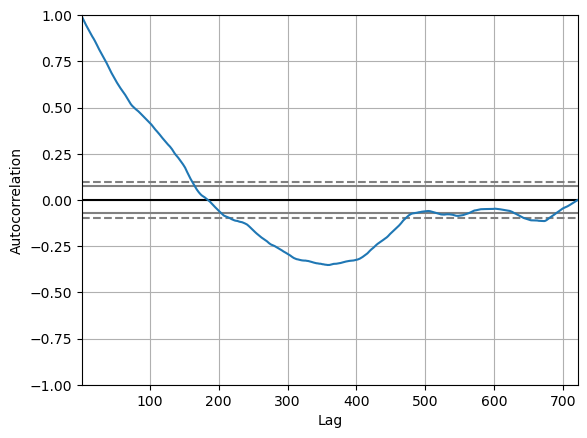

In [100]:
pd.plotting.autocorrelation_plot(df_all['HSI'])